# Differential steering platform

This example shows the movement of a differential robotics platform on an empty space following a specific path.

The model receive the speed of each side of the platform:

$$
v_l(t)
$$

$$
v_r(t)
$$

and return the position and direction of the robot:

$$
X(t) = \left[ x(t), \ y(t), \ \theta(t) \right]
$$

In [ ]:
# Installing the modules
# Python robotics toolbox require numpy 1.2x
!pip install matplotlib numpy==1.26.4 roboticstoolbox-python

In [12]:
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import numpy as np

Create the robot at $ \ x=0$, $ \ y=0$, $ \ \theta=\pi/2 \ $ (90°)

In [13]:
robot = rtb.DiffSteer(x0=(0, 0, np.pi/2))
robot

DiffSteer: x = [ 0, 0, 1.57 ]
  W=1, steer_max=inf, vel_max=inf, accel_max=inf

define the path through the vectors $v_l$ and $v_r$ 

In [14]:
vl = [2, 4, 2]
vr = [2, -4, 2]

repeat 5 times the input vectors as simulation steps, using the method `.step()`

In [15]:
times = 5

for _ in range(times):
    for vl_i, vr_i in zip(vl, vr):
        robot.step((vl_i, vr_i))
        
print(robot.x_hist)

[[ 1.22464680e-17  2.00000000e-01  1.57079633e+00]
 [ 1.22464680e-17  2.00000000e-01  7.70796327e-01]
 [ 1.43471218e-01  3.39341342e-01  7.70796327e-01]
 [ 2.86942436e-01  4.78682684e-01  7.70796327e-01]
 [ 2.86942436e-01  4.78682684e-01 -2.92036732e-02]
 [ 4.86857157e-01  4.72842779e-01 -2.92036732e-02]
 [ 6.86771878e-01  4.67002875e-01 -2.92036732e-02]
 [ 6.86771878e-01  4.67002875e-01 -8.29203673e-01]
 [ 8.21864514e-01  3.19524132e-01 -8.29203673e-01]
 [ 9.56957150e-01  1.72045389e-01 -8.29203673e-01]
 [ 9.56957150e-01  1.72045389e-01 -1.62920367e+00]
 [ 9.45282321e-01 -2.76135666e-02 -1.62920367e+00]
 [ 9.33607492e-01 -2.27272522e-01 -1.62920367e+00]
 [ 9.33607492e-01 -2.27272522e-01 -2.42920367e+00]
 [ 7.82246993e-01 -3.58001246e-01 -2.42920367e+00]]


`x.hist` returns the history of vector `x` that represent the current position and orientation of the robot: $\left[ x(t), \ y(t), \ \theta(t) \right]$

Finally, plots the path obtained by each step of simulation (only $x$ and $y$)

Text(0.5, 1.0, 'Robot location')

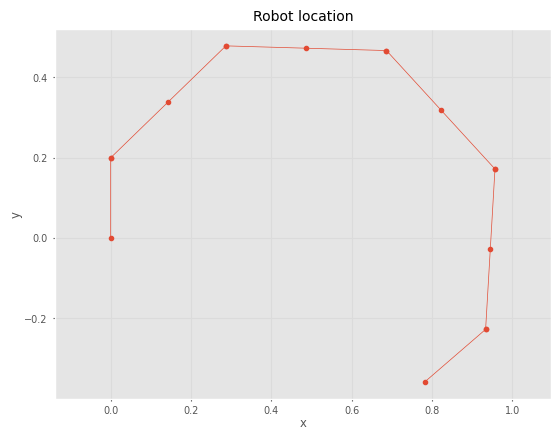

In [ ]:
x = np.insert(robot.x_hist[:,0], 0, robot.x0[0])
y = np.insert(robot.x_hist[:,1], 0, robot.x0[1])

plt.plot(x, y, marker='.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Robot location')